### Data Set Creation

Size of the dataset - 10,000 cpu times

CPU Times are estiamted for process types and generated based on assumption

Type of Process

1. OS - 3s - 5s
2. GUI - 6s - 8s
3. Foreground 10s - 12s
4. Background - 12s - 15s
5. Backup - 20s

In [1]:
import random
import statistics 
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def os_cpu_time():
  return random.choice([3,4,5])

def gui_cpu_time():
  return random.choice([6,7,8])

def fg_cpu_time():
  return random.choice([10,11,12])

def bg_cpu_time():
  return random.choice([12,13,14,15])

def bk_cpu_time():
  return random.choice([18,19,20,21])

In [3]:
result = []
for _ in range(10000):
  result.append(random.choice([os_cpu_time, gui_cpu_time, fg_cpu_time, bg_cpu_time, bk_cpu_time])())

In [4]:
assert len(result) == 10000

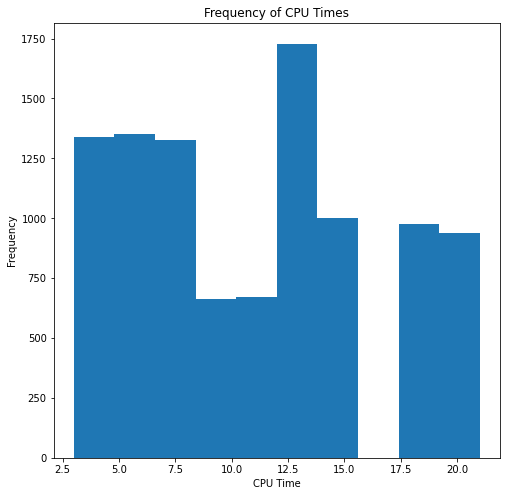

In [5]:
plt.figure(figsize=(8, 8))
plt.hist(result)
plt.title("Frequency of CPU Times")
plt.xlabel("CPU Time")
plt.ylabel("Frequency")
plt.show()

In [6]:
print(result[:20])

[12, 21, 15, 20, 5, 5, 8, 4, 3, 5, 14, 10, 15, 4, 21, 14, 5, 10, 11, 4]


### Chebyshev's inequality



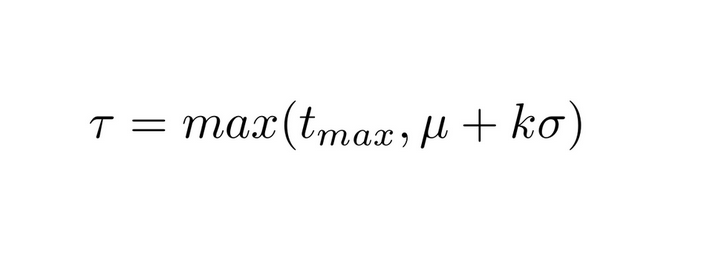

In [7]:
tmax = max(result)
mean = statistics.mean(result)
stdev = statistics.stdev(result)
k = range(20)
l1 = []

In [8]:
for _ in k:
  r = max(tmax, mean + _ * stdev)
  print(f"For k = {_} Threshold = {r}")
  l1.append(r)

For k = 0 Threshold = 21
For k = 1 Threshold = 21
For k = 2 Threshold = 21.68117002365578
For k = 3 Threshold = 27.061755035483678
For k = 4 Threshold = 32.44234004731157
For k = 5 Threshold = 37.82292505913946
For k = 6 Threshold = 43.203510070967354
For k = 7 Threshold = 48.584095082795244
For k = 8 Threshold = 53.964680094623134
For k = 9 Threshold = 59.34526510645102
For k = 10 Threshold = 64.72585011827891
For k = 11 Threshold = 70.1064351301068
For k = 12 Threshold = 75.4870201419347
For k = 13 Threshold = 80.8676051537626
For k = 14 Threshold = 86.24819016559049
For k = 15 Threshold = 91.62877517741838
For k = 16 Threshold = 97.00936018924627
For k = 17 Threshold = 102.38994520107416
For k = 18 Threshold = 107.77053021290205
For k = 19 Threshold = 113.15111522472993


### Markov's inequality

![image
](https://wikimedia.org/api/rest_v1/media/math/render/svg/a1786af7aa4d42a93bb9baaa10c334ecc710522e)

In [9]:
def calc_freq(result):
  d = {}
  for i in result:
    d[i] = d.get(i, 0) + 1
  return d

def expected_value(result):
  d = calc_freq(result)
  values = np.asarray(list(d.keys()))
  weights = np.asarray(list(d.values()))
  return (values * weights).sum() / weights.sum()

In [10]:
x = max(result)
e = expected_value(result)
a = range(20)
l2 = []

In [11]:
for _ in a:
  r = max(x,  _ * e)
  print(f"For a = {_} Threshold = {r}")
  l2.append(r)

For a = 0 Threshold = 21
For a = 1 Threshold = 21
For a = 2 Threshold = 21.84
For a = 3 Threshold = 32.76
For a = 4 Threshold = 43.68
For a = 5 Threshold = 54.6
For a = 6 Threshold = 65.52
For a = 7 Threshold = 76.44
For a = 8 Threshold = 87.36
For a = 9 Threshold = 98.28
For a = 10 Threshold = 109.2
For a = 11 Threshold = 120.12
For a = 12 Threshold = 131.04
For a = 13 Threshold = 141.96
For a = 14 Threshold = 152.88
For a = 15 Threshold = 163.8
For a = 16 Threshold = 174.72
For a = 17 Threshold = 185.64
For a = 18 Threshold = 196.56
For a = 19 Threshold = 207.48


### Modified Chebyshev's inequality

In [12]:
tmax = max(result)
mean = statistics.mean(result)
var = statistics.variance(result)
k = range(20)

In [13]:
for _ in k:
  r = max(tmax * tmax, mean * mean + _ * _ * var + 2 * mean * _ * math.sqrt(var))
  print(f"For k = {_} Threshold = {math.sqrt(r)}")

For k = 0 Threshold = 21.0
For k = 1 Threshold = 21.0
For k = 2 Threshold = 21.68117002365578
For k = 3 Threshold = 27.06175503548367
For k = 4 Threshold = 32.44234004731157
For k = 5 Threshold = 37.82292505913946
For k = 6 Threshold = 43.20351007096735
For k = 7 Threshold = 48.58409508279524
For k = 8 Threshold = 53.964680094623134
For k = 9 Threshold = 59.34526510645102
For k = 10 Threshold = 64.72585011827891
For k = 11 Threshold = 70.1064351301068
For k = 12 Threshold = 75.48702014193469
For k = 13 Threshold = 80.86760515376258
For k = 14 Threshold = 86.24819016559047
For k = 15 Threshold = 91.62877517741838
For k = 16 Threshold = 97.00936018924627
For k = 17 Threshold = 102.38994520107416
For k = 18 Threshold = 107.77053021290205
For k = 19 Threshold = 113.15111522472993


In [14]:
df = pd.DataFrame(list(zip(l1,l2)), columns=["Chebyshev's inequality","Markov's inequality"])

In [15]:
df.index += 1

In [16]:
df

,Chebyshev's inequality,Markov's inequality
1,21.000000,21.00
2,21.000000,21.00
3,21.681170,21.84
4,27.061755,32.76
5,32.442340,43.68
6,37.822925,54.60
7,43.203510,65.52
8,48.584095,76.44
9,53.964680,87.36
10,59.345265,98.28


<AxesSubplot:>

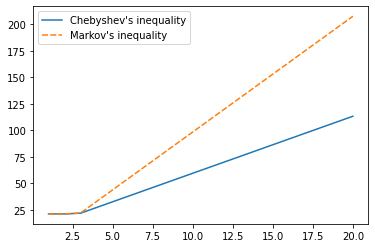

In [17]:
sns.lineplot(data=df)

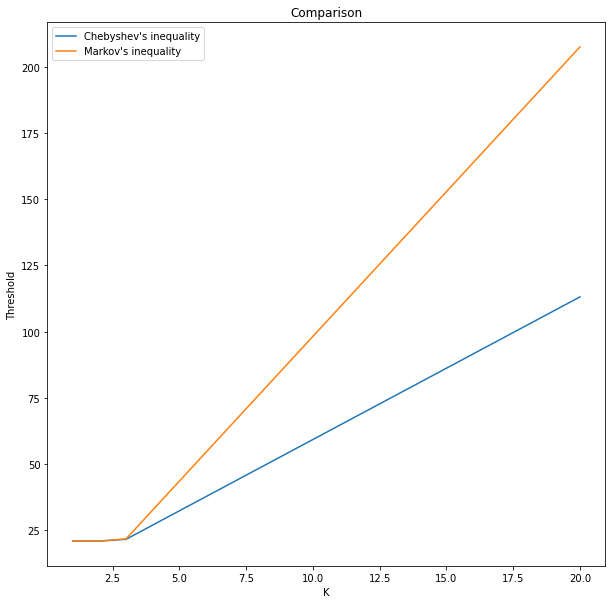

In [18]:
plt.figure(figsize=(10, 10))
plt.plot(df.index, df["Chebyshev's inequality"], label = "Chebyshev's inequality")
plt.plot(df.index, df["Markov's inequality"], label = "Markov's inequality")
plt.legend()
plt.title("Comparison")
plt.xlabel("K")
plt.ylabel("Threshold")
plt.show()

## Implementation of Chebyshev's inequality

In [102]:
thresh = 0
mean = 0
old_std_dev = 0
tmax = 0
n = 0
k = 3
res = []
new_std_dev = 0

In [103]:
def update():
  global tmax, mean, old_mean, n, k, old_std_dev, new_std_dev, thresh
  tmax = max(tmax, t)
  old_mean = mean
  mean = (n * mean + t) / (n + 1)
  new_std_dev = math.sqrt((n * old_std_dev**2 + (t - old_mean)**2) / (n + 1))
  old_std_dev = new_std_dev
  thresh = max(tmax, mean + k * new_std_dev)

In [104]:
t = random.choice([os_cpu_time, gui_cpu_time, fg_cpu_time, bg_cpu_time, bk_cpu_time])()
res.append(t)
n += 1
update()

In [111]:
t

6

In [112]:
tmax

21

In [113]:
mean

11.497005988023949

In [114]:
new_std_dev

5.469290586491538

In [115]:
thresh

27.90487774749856

In [109]:
res

[12]

In [110]:
for _ in range(1000):
  t = random.choice([os_cpu_time, gui_cpu_time, fg_cpu_time, bg_cpu_time, bk_cpu_time])()
  res.append(t)
  n += 1
  update()